In [2]:
%matplotlib inline
import numpy as np

import scipy.stats as stat
import scipy.integrate as pyint
import scipy.optimize as opt

import matplotlib.pyplot as plt
from matplotlib import cm

# Unfolding
## Exercise 1
### Part a

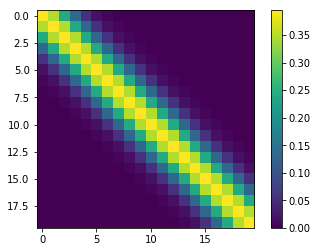

In [3]:
Nbins = 20
bin_edges = np.linspace(0,100,Nbins+1)
sigma = 2*(bin_edges[1]-bin_edges[0])
c_norm = 1./(np.sqrt(2)*sigma*pyint.quad(lambda x: np.exp(-x**2),0,100)[0])
def res_function(x,y):
    return c_norm*np.exp(-(x-y)**2/(2*sigma**2))

def int_res_fun(y,xa,xb):
    return pyint.quad(lambda x: res_function(x,y),xa,xb)[0]

bin_midpoint = .5*(bin_edges[1:]+bin_edges[:-1])
R_matrix = np.empty((Nbins,Nbins))
for i in range(Nbins):
    for j in range(Nbins):
        R_matrix[i,j]=int_res_fun(bin_midpoint[j],bin_edges[i],bin_edges[i+1])
        
plt.imshow(R_matrix)
plt.colorbar()

### Part b

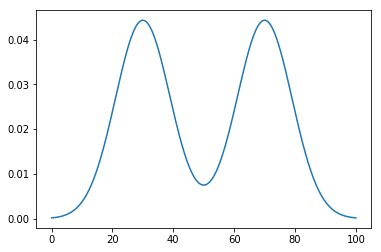

In [4]:
sigma_data = 9
c_data = 1./(np.sqrt(2)*sigma_data*pyint.quad(lambda x: np.exp(-x**2),0,100)[0])

def f_true(x):
    return .5*c_data*(np.exp(-(x-30)**2/(2*sigma_data**2))+np.exp(-(x-70)**2/(2*sigma_data**2)))

x_plot = np.linspace(0,100,1000)
plt.plot(x_plot,f_true(x_plot))

In [5]:
N = 100000
fmax = max(x_plot)
mu_sample_b = np.empty(2*N)
samples = 0
while samples<N:
    mu = 100*np.random.random(5*10**6)           
    y = fmax*np.random.random(5*10**6)
    mu = mu[y<=f_true(mu)]
    samples += len(mu)
    mu_sample_b[samples-len(mu):samples] = mu
mu_sample_b = mu_sample_b[:N]

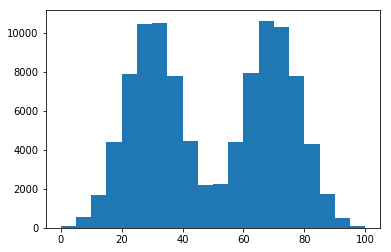

In [6]:
mu_hist, bin_edges, patches = plt.hist(mu_sample_b,bins=bin_edges)

<Container object of 20 artists>

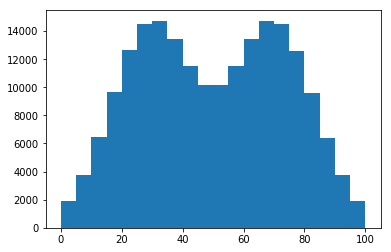

In [7]:
nu_hist = np.dot(R_matrix,mu_hist)
plt.bar(bin_midpoint,nu_hist,width=bin_edges[1]-bin_edges[0])

<Container object of 20 artists>

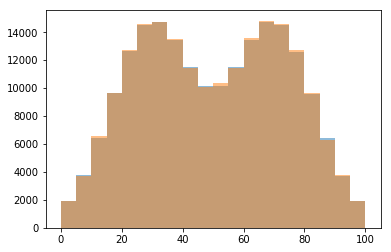

In [8]:
N_d = len(nu_hist)
poisson = stat.poisson(nu_hist)
Nexperiment_d = poisson.rvs(N_d)
plt.figure()
plt.bar(bin_midpoint,nu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5)
plt.bar(bin_midpoint,Nexperiment_d,width=bin_edges[1]-bin_edges[0],alpha=0.5)

### Part e

<Container object of 20 artists>

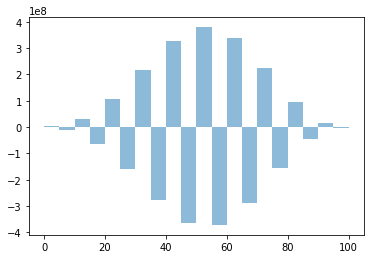

In [9]:
R_inv = np.linalg.inv(R_matrix)
mu_estimated_inv = np.dot(R_inv,Nexperiment_d)
plt.figure()
plt.bar(bin_midpoint,mu_estimated_inv,width=bin_edges[1]-bin_edges[0],alpha=0.5)
plt.bar(bin_midpoint,mu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5)

### Part f

In [27]:
def likelihood_mu_hist(mu_hist_try):
    nu_hist_try = np.dot(R_matrix,mu_hist_try)
    logp_i = ((nu_hist_try-Nexperiment_d)/Nexperiment_d)**2
    return sum(logp_i)

minimization_like = opt.minimize(likelihood_mu_hist,Nexperiment_d)
mu_estimated_like = minimization_like['x']

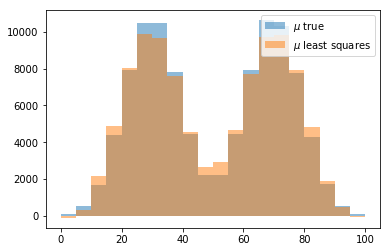

In [28]:
plt.bar(bin_midpoint,mu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5,label=r'$\mu$ true')
plt.bar(bin_midpoint,mu_estimated_like,width=bin_edges[1]-bin_edges[0],alpha=0.5, label= '$\mu$ least squares')
plt.legend()